# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 02: Extracción y Revisión de Datos</center></h1>

Esta actividad busca aplicar lo que acabamos de ver en clases sobre extracción de datos y conectarlo con la materia de "Tipos de Datos" que hemos visto en las clases pasadas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados en un único archivo .zip, al módulo de la Actividad 02 en Canvas.</b>

Para esta actividad deben hacer lo siguiente:
<ol>
<li>Extraer datos</li>

Para esta actividad usaremos [**PokeAPI**](https://pokeapi.co/about), una interfaz de código abierto con información detallada relacionada a los videojuegos de Pokémon.
    
En esta actividad nos concentraremos en comparar las características básicas de los 151 pokémon originales. Para obtener la información de un pokémon, utilizaremos el siguiente URL:

```
https://pokeapi.co/api/v2/pokemon/{id_pokemon}
```

Donde `{id_pokemon}` es el identificador del pokémon (un número entero). 
    
<br>

<li>Formato</li>

¿En qué formato están los datos descargados? Identifique si son datos estructurados, semi-estructurados o no estructurados, explicando claramente por qué los categoriza así.

<br>
    
<li>DataFrame de análisis</li>

Construya un DataFrame con al menos las siguientes columnas: `name, type1, type2, hp, attack, defense, special-attack, special-defense, speed`. En caso de que un pokémon tenga solo un tipo, puede dejar su atributo `type2 = None`. Guarde este nuevo set de datos en un archivo CSV.

**Hint:** Inspeccione el atributo `stats` y `types` de las respuestas obtenidas. El valor que debe almacenar en el DataFrame estará bajó el nombre `base_stat`.
    
<br>
    
<li>Preguntas</li>

A partir de su nuevo dataset, responda las siguientes preguntas:

4.1 ¿Cuál son los 3 tipos (fuego, agua, tierra, etc.) más comunes en los pokémones de la primera generación?
    
4.2 ¿Cuál es el pokémon más rápido? ¿Y el más lento?

4.3 Genere una nueva columna en el DataFrame llamada `total-stats` que consista en la suma de todos los stats de un pokémon (`hp, attack, defense, special-attack, special-defense, speed`) y grafique un histograma de esta nueva variable. ¿Cuál es el rango de valores

## Rúbrica

- Si han hecho todo y sólo hay errores menores: 7.0
- Si sólo llegaron hasta la parte 3: 5.0
- Menos que eso: 1.0

## 1. Extraer datos

Utilizando el URL indicado en el enunciado, obtenga la información de los primeros 151 pokémones y guárdelos en una lista llamada `pokemones`. 

Para ello debe usar un `for` que itere sobre los diferentes IDs de pokemon y rescate la información de cada uno de ellos, concatenándola en una lista. Antes de iterar sobre los 151 pokemones, pruebe con 1 o 2 y una vez que verifique que su código está funcionando, aplique a los 151 primeros pokemones.

In [5]:
import requests

pokemones = []
for i in range(1, 152):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    r = requests.get(url)
    pokemones.append(r.json())

In [6]:
pokemones[0]

{'abilities': [{'ability': {'name': 'overgrow',
    'url': 'https://pokeapi.co/api/v2/ability/65/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'chlorophyll',
    'url': 'https://pokeapi.co/api/v2/ability/34/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 64,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/1.ogg',
  'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/1.ogg'},
 'forms': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}],
 'game_indices': [{'game_index': 153,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 153,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 153,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 1,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/versio

In [7]:
pokemones[0]['stats']

[{'base_stat': 45,
  'effort': 0,
  'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}},
 {'base_stat': 49,
  'effort': 0,
  'stat': {'name': 'attack', 'url': 'https://pokeapi.co/api/v2/stat/2/'}},
 {'base_stat': 49,
  'effort': 0,
  'stat': {'name': 'defense', 'url': 'https://pokeapi.co/api/v2/stat/3/'}},
 {'base_stat': 65,
  'effort': 1,
  'stat': {'name': 'special-attack',
   'url': 'https://pokeapi.co/api/v2/stat/4/'}},
 {'base_stat': 65,
  'effort': 0,
  'stat': {'name': 'special-defense',
   'url': 'https://pokeapi.co/api/v2/stat/5/'}},
 {'base_stat': 45,
  'effort': 0,
  'stat': {'name': 'speed', 'url': 'https://pokeapi.co/api/v2/stat/6/'}}]

In [8]:
pokemones[0]['types']

[{'slot': 1,
  'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}},
 {'slot': 2,
  'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}]

## 2. Formato de datos

Revise la lista que almacenó en `pokemones` y coméntenos en qué formato están los datos y qué tipos de datos serían estos (estructurados, semi-estructurados, no estructurados).

Respuesta:

Los datos son semi-estructurados, ya que vienen en formato JSON, con atributos anidados como strings, arrays o valores numéricos.

## 3. DataFrame de análisis

Construya ahor un DataFrame para poder analizar los datos posteriormente. Revise las columnas mínimas que debe tener según el enunciado inicial.

In [9]:
import pandas as pd

rows = []

for r in pokemones:
    # Por cada respuesta, creamos una fila con los atributos deseados
    row_as_dict = {"name": r['name']}
    
    # Obtenemos los tipos
    types_dict = {t['slot'] : t['type']['name'] for t in r['types']}

    # Obtenemos los stats
    stats_dict = { stat["stat"]["name"]: stat["base_stat"] for stat in r["stats"]}
    
    # Fusionamos los dict
    row_as_dict.update(types_dict)
    row_as_dict.update(stats_dict)
    
    # Agregamos a la lista
    rows.append(row_as_dict)

In [10]:
# Creamos nuestro DataFrame
df = pd.DataFrame(rows)
df = df.rename(columns={1: "type1", 2: "type2"})
df


,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed
0,bulbasaur,grass,poison,45,49,49,65,65,45
1,ivysaur,grass,poison,60,62,63,80,80,60
2,venusaur,grass,poison,80,82,83,100,100,80
3,charmander,fire,NaN,39,52,43,60,50,65
4,charmeleon,fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
146,dratini,dragon,NaN,41,64,45,50,50,50
147,dragonair,dragon,NaN,61,84,65,70,70,70
148,dragonite,dragon,flying,91,134,95,100,100,80
149,mewtwo,psychic,NaN,106,110,90,154,90,130


In [11]:
# Guardar a CSV
df.to_csv("pokemon-stats.csv")

## 4. Preguntas

#### 4.1 ¿Cuál son los 3 tipos (*water, fire, ground,* etc.) más comunes en los pokémones de la primera generación?

Como tenemos tipo 1 y tipo 2, vamos a sumar los valores de ambas columnas para obtener el tipo más común.

In [12]:
type1_counts = df.type1.value_counts().reset_index() # Cantidad de tipo 1
type2_counts = df.type2.value_counts().reset_index() # Cantidad de tipo 2


joined_types = type1_counts.merge(type2_counts, left_on='type1', right_on='type2', how='left')
joined_types = joined_types.fillna(0)
joined_types

,type1,count_x,type2,count_y
0,water,28,water,4.0
1,normal,22,0,0.0
2,poison,14,poison,19.0
3,grass,12,grass,2.0
4,fire,12,0,0.0
5,bug,12,0,0.0
6,electric,9,0,0.0
7,rock,9,rock,2.0
8,ground,8,ground,6.0
9,psychic,8,psychic,6.0


In [13]:
joined_types['total_count'] = (joined_types['count_x'] + joined_types['count_y']).astype(int)
joined_types.sort_values('total_count', ascending=False, inplace=True)

joined_types[['type1', 'total_count']]

,type1,total_count
2,poison,33
0,water,32
1,normal,22
3,grass,14
8,ground,14
9,psychic,14
4,fire,12
5,bug,12
7,rock,11
6,electric,9


El tipo más común es Poison (33), seguido de Water (32) y Normal (22).

#### 4.2 ¿Cuál es el pokémon más rápido? ¿Y el más lento?

In [14]:
df.sort_values("speed", ascending=False)

,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed
100,electrode,electric,NaN,60,50,70,80,80,150
141,aerodactyl,rock,flying,80,105,65,60,75,130
134,jolteon,electric,NaN,65,65,60,110,95,130
149,mewtwo,psychic,NaN,106,110,90,154,90,130
64,alakazam,psychic,NaN,55,50,45,135,95,120
...,...,...,...,...,...,...,...,...,...
45,paras,bug,grass,35,70,55,45,55,25
110,rhyhorn,ground,rock,80,85,95,30,30,25
38,jigglypuff,normal,fairy,115,45,20,45,25,20
73,geodude,rock,ground,40,80,100,30,30,20


El pokémon más rápido es Electrode y el más lento Slowpoke.

#### 4.3 Genere una nueva columna en el DataFrame llamada `total-stats` que consista en la suma de todos los stats de un pokémon (`hp, attack, defense, special-attack, special-defense, speed`) ¿Cuáles son los valores mínimo y máximo de esta nueva variable?

In [15]:
df['total-stats'] = df['hp'] + df['attack'] + df['defense'] + df['special-attack'] + df['special-defense'] + df['speed']
df.sort_values("total-stats", ascending=False)

,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed,total-stats
149,mewtwo,psychic,NaN,106,110,90,154,90,130,680
150,mew,psychic,NaN,100,100,100,100,100,100,600
148,dragonite,dragon,flying,91,134,95,100,100,80,600
143,articuno,ice,flying,90,85,100,95,125,85,580
145,moltres,fire,flying,90,100,90,125,85,90,580
...,...,...,...,...,...,...,...,...,...,...
13,kakuna,bug,poison,45,25,50,25,25,35,205
10,metapod,bug,NaN,50,20,55,25,25,30,205
128,magikarp,water,NaN,20,10,55,15,20,80,200
9,caterpie,bug,NaN,45,30,35,20,20,45,195


El valor máximo lo tiene Mewtwo con 680, y el mínimo Caterpie y Weedle, con solo 195.

#### 4.4 Grafique un histograma de `total-stats` y comente brevemente lo que observa de la distribución de este atributo.

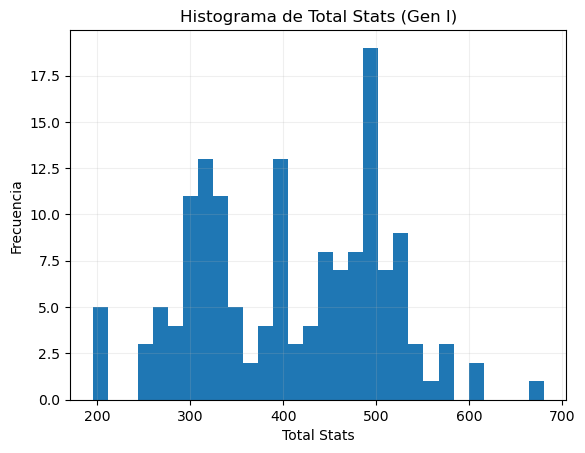

In [16]:
import matplotlib.pyplot as plt

fig = plt.hist(x=df['total-stats'], bins=30)
plt.grid(alpha=0.2)
plt.title('Histograma de Total Stats (Gen I)')
plt.xlabel('Total Stats')
plt.ylabel('Frecuencia')
plt.show()

Existen 3 "peaks" del atributo `total-stats`, uno cercano a 310, el segundo cerca de 390 y el último alrededor de 490.